## Case2. 2016범죄 발생 유형별 분석

In [29]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [8]:
df = pd.read_csv('data/public_crime_stat_2016.csv', encoding='EUC-KR')
df.head(10)

,범죄대분류,범죄중분류,계,서울,부산,대구,인천,광주,대전,울산,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,356,46,29,17,20,9,16,7,...,2,0,3,2,3,0,0,4,2,51
1,강력범죄,살인미수등,558,100,43,12,28,8,9,15,...,0,3,1,3,15,3,1,11,2,49
2,강력범죄,강도,1149,260,137,51,88,47,35,33,...,4,1,7,6,26,1,1,24,1,46
3,강력범죄,강간,5155,1129,314,197,347,170,171,112,...,8,5,31,32,68,15,16,68,11,366
4,강력범죄,유사강간,583,123,28,37,47,21,14,16,...,0,2,4,1,7,1,3,13,0,33
5,강력범죄,강제추행,16054,4667,951,632,1176,488,420,293,...,12,25,76,74,202,27,95,223,39,743
6,강력범죄,기타 강간 강제추행등,408,72,30,14,27,15,15,9,...,0,4,1,3,7,3,1,7,3,47
7,강력범죄,방화,1502,286,98,68,84,38,44,38,...,5,2,5,6,29,0,11,15,4,135
8,절도범죄,절도범죄,203037,46861,16777,9171,10025,6050,6981,4227,...,413,307,974,1700,3760,551,927,2573,369,9839
9,폭력범죄,상해,50028,6949,4637,2863,2289,1309,1415,1422,...,170,177,312,395,1243,372,344,638,124,4325


In [9]:
df['범죄대분류'].unique()

array(['강력범죄', '절도범죄', '폭력범죄', '지능범죄', '풍속범죄', '특별경제범죄', '마약범죄', '보건범죄',
       '환경범죄', '교통범죄', '노동범죄', '안보범죄', '선거범죄', '병역범죄', '기타범죄'],
      dtype=object)

In [10]:
df['범죄중분류'].unique()

array(['살인기수', '살인미수등', '강도', '강간', '유사강간', '강제추행', '기타 강간  강제추행등', '방화',
       '절도범죄', '상해', '폭행', '체포  감금', '협박', '약취  유인', '폭력행위등', '공갈', '손괴',
       '직무유기', '직권남용', '증수뢰', '통화', '문서  인장', '유가증권인지', '사기', '횡령', '배임',
       '성풍속범죄', '도박범죄', '특별경제범죄', '마약범죄', '보건범죄', '환경범죄', '교통범죄', '노동범죄',
       '안보범죄', '선거범죄', '병역범죄', '기타범죄'], dtype=object)

#### # 범죄중분류 별 건수

In [11]:
df_index = pd.Series(df['계'].values, index=df['범죄중분류'].values)
df_index

살인기수               356
살인미수등              558
강도                1149
강간                5155
유사강간               583
강제추행             16054
기타 강간  강제추행등       408
방화                1502
절도범죄            203037
상해               50028
폭행              165803
체포  감금            1318
협박               15870
약취  유인             201
폭력행위등            13302
공갈                3745
손괴               59127
직무유기               531
직권남용               437
증수뢰                260
통화                1811
문서  인장           13295
유가증권인지             219
사기              241613
횡령               50053
배임                4358
성풍속범죄            12719
도박범죄             13446
특별경제범죄           65025
마약범죄              7329
보건범죄             14662
환경범죄              4349
교통범죄            600401
노동범죄              2457
안보범죄                81
선거범죄              1018
병역범죄             16651
기타범죄            260539
dtype: int64

In [12]:
df_index.values

array([   356,    558,   1149,   5155,    583,  16054,    408,   1502,
       203037,  50028, 165803,   1318,  15870,    201,  13302,   3745,
        59127,    531,    437,    260,   1811,  13295,    219, 241613,
        50053,   4358,  12719,  13446,  65025,   7329,  14662,   4349,
       600401,   2457,     81,   1018,  16651, 260539], dtype=int64)

#####  [Note]
- 값안에 콤마(,)가 있다는 의미는 숫자가 아니라 문자란 말이다.

In [13]:
df_index.values[2]

1149

In [14]:
type(df_index.values[2])

numpy.int64

#### # 문자열을 정수형으로 변환

In [15]:
df_index.values

array([   356,    558,   1149,   5155,    583,  16054,    408,   1502,
       203037,  50028, 165803,   1318,  15870,    201,  13302,   3745,
        59127,    531,    437,    260,   1811,  13295,    219, 241613,
        50053,   4358,  12719,  13446,  65025,   7329,  14662,   4349,
       600401,   2457,     81,   1018,  16651, 260539], dtype=int64)

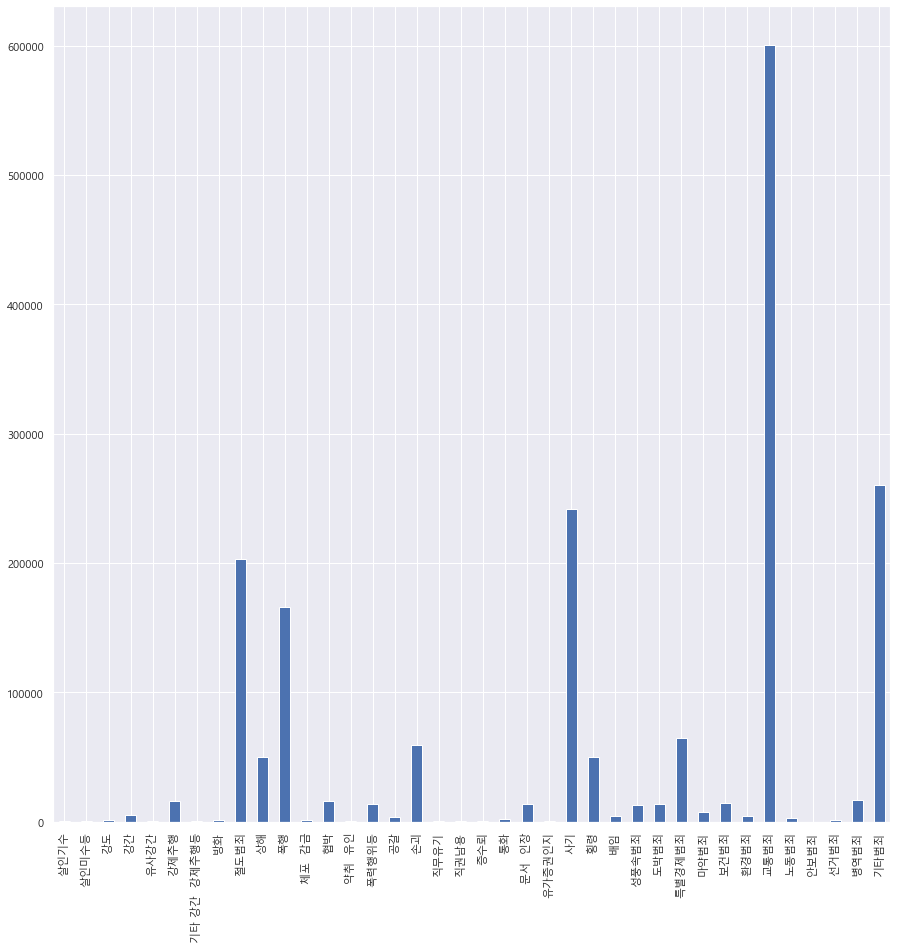

In [49]:
df_index.plot(kind='bar');

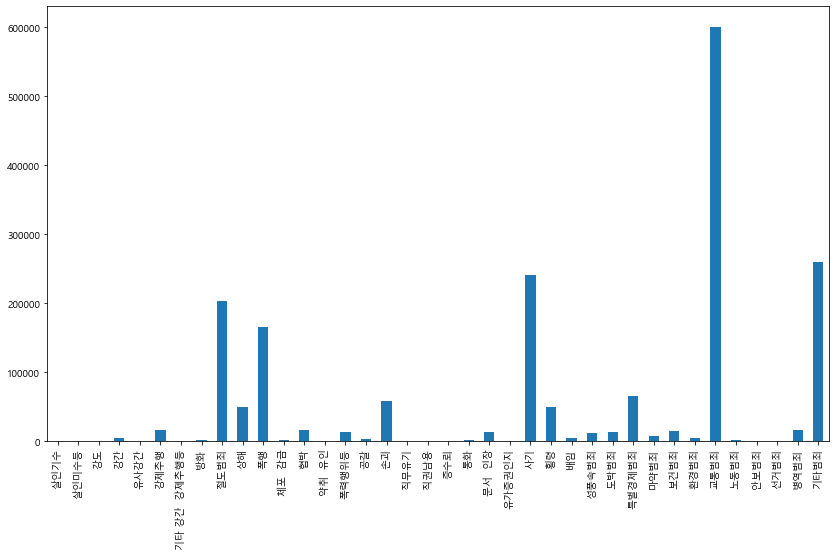

In [17]:
plt.rcParams["figure.figsize"] = [14,8]
df_index.plot(kind='bar');

#### # 범죄대분류 별 건수 

In [18]:
df_crime = pd.Series(df['계'].values, index=df['범죄대분류'].values)
df_crime

강력범죄         356
강력범죄         558
강력범죄        1149
강력범죄        5155
강력범죄         583
강력범죄       16054
강력범죄         408
강력범죄        1502
절도범죄      203037
폭력범죄       50028
폭력범죄      165803
폭력범죄        1318
폭력범죄       15870
폭력범죄         201
폭력범죄       13302
폭력범죄        3745
폭력범죄       59127
지능범죄         531
지능범죄         437
지능범죄         260
지능범죄        1811
지능범죄       13295
지능범죄         219
지능범죄      241613
지능범죄       50053
지능범죄        4358
풍속범죄       12719
풍속범죄       13446
특별경제범죄     65025
마약범죄        7329
보건범죄       14662
환경범죄        4349
교통범죄      600401
노동범죄        2457
안보범죄          81
선거범죄        1018
병역범죄       16651
기타범죄      260539
dtype: int64

In [19]:
df_crime.index[0]

'강력범죄'

In [20]:
df_crime.get('강력범죄')

강력범죄      356
강력범죄      558
강력범죄     1149
강력범죄     5155
강력범죄      583
강력범죄    16054
강력범죄      408
강력범죄     1502
dtype: int64

In [23]:
df_crime[0]

356

In [46]:
def get_crime_cnt(d_frame):
    crime_cnt = {}
    for idx in range(len(d_frame.index)):
        
        crime = d_frame.index[idx]
        count = d_frame[idx]
        
        if crime_cnt.get(crime):
            crime_cnt[crime] += count      
        else:
            crime_cnt[crime] = count
            
    return crime_cnt

crime_dict = get_crime_cnt(df_crime)
crime_dict

{'강력범죄': 25765,
 '절도범죄': 203037,
 '폭력범죄': 309394,
 '지능범죄': 312577,
 '풍속범죄': 26165,
 '특별경제범죄': 65025,
 '마약범죄': 7329,
 '보건범죄': 14662,
 '환경범죄': 4349,
 '교통범죄': 600401,
 '노동범죄': 2457,
 '안보범죄': 81,
 '선거범죄': 1018,
 '병역범죄': 16651,
 '기타범죄': 260539}

# !

In [ ]:
from functools import * 
def count_columns(result_dic, element) : 
    if result_dic.get(element):
        result_dic[element] += 1
    else:
        result_dic[element] = 1
        
    return result_dic

def get_group_count(df_column) :
    return reduce(count_columns, df_column, dict())

# !

In [32]:
crime_stat = pd.Series(crime_dict)
crime_stat.name = "범죄발생수"
crime_stat

강력범죄       25765
절도범죄      203037
폭력범죄      309394
지능범죄      312577
풍속범죄       26165
특별경제범죄     65025
마약범죄        7329
보건범죄       14662
환경범죄        4349
교통범죄      600401
노동범죄        2457
안보범죄          81
선거범죄        1018
병역범죄       16651
기타범죄      260539
Name: 범죄발생수, dtype: int64

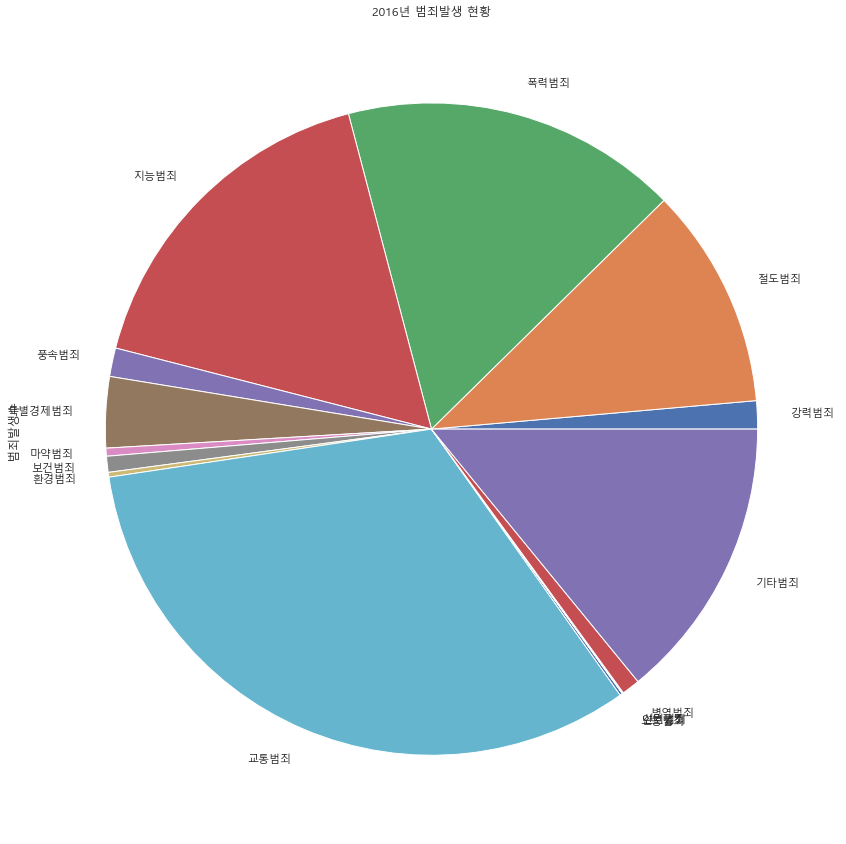

In [47]:
plt.rcParams["figure.figsize"] = [15,15]
crime_stat.plot(kind='pie', title = '2016년 범죄발생 현황');

#### # Seaborn을 사용한 데이터 시각화

In [35]:
import seaborn as sns
sns.set()

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [36]:
df_index.sort_values(ascending=False).head(10)

교통범죄      600401
기타범죄      260539
사기        241613
절도범죄      203037
폭행        165803
특별경제범죄     65025
손괴         59127
횡령         50053
상해         50028
병역범죄       16651
dtype: int64

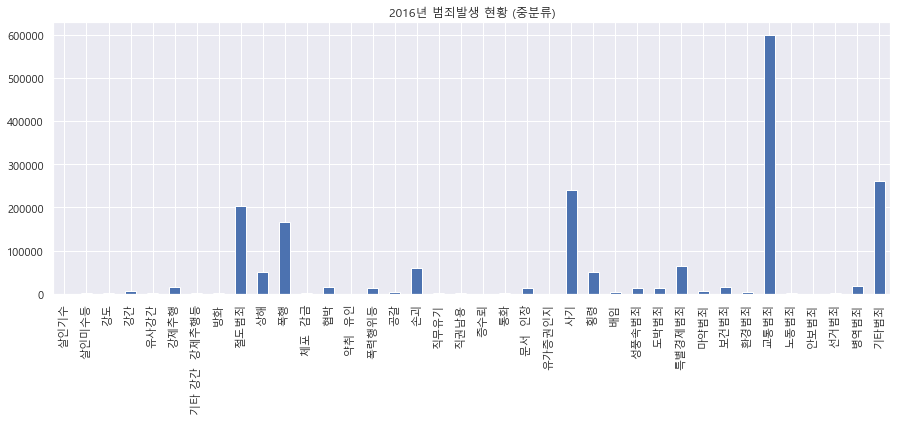

In [37]:
plt.rcParams["figure.figsize"] = [15,5]
df_index.plot(kind='bar', title='2016년 범죄발생 현황 (중분류)');

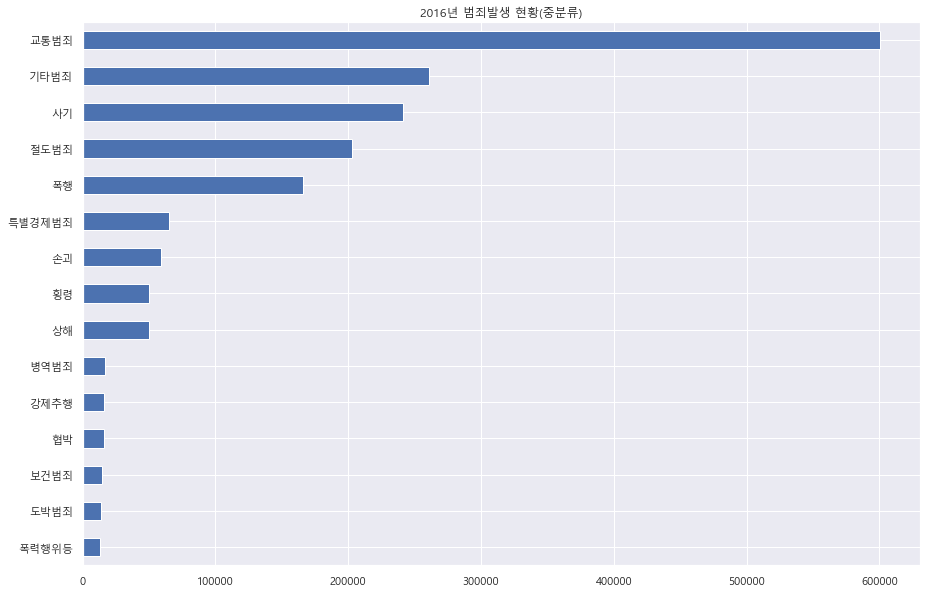

In [38]:
plt.rcParams["figure.figsize"] = [15,10]
df_index.sort_values(ascending=True).tail(15).plot(kind='barh', title='2016년 범죄발생 현황(중분류)');

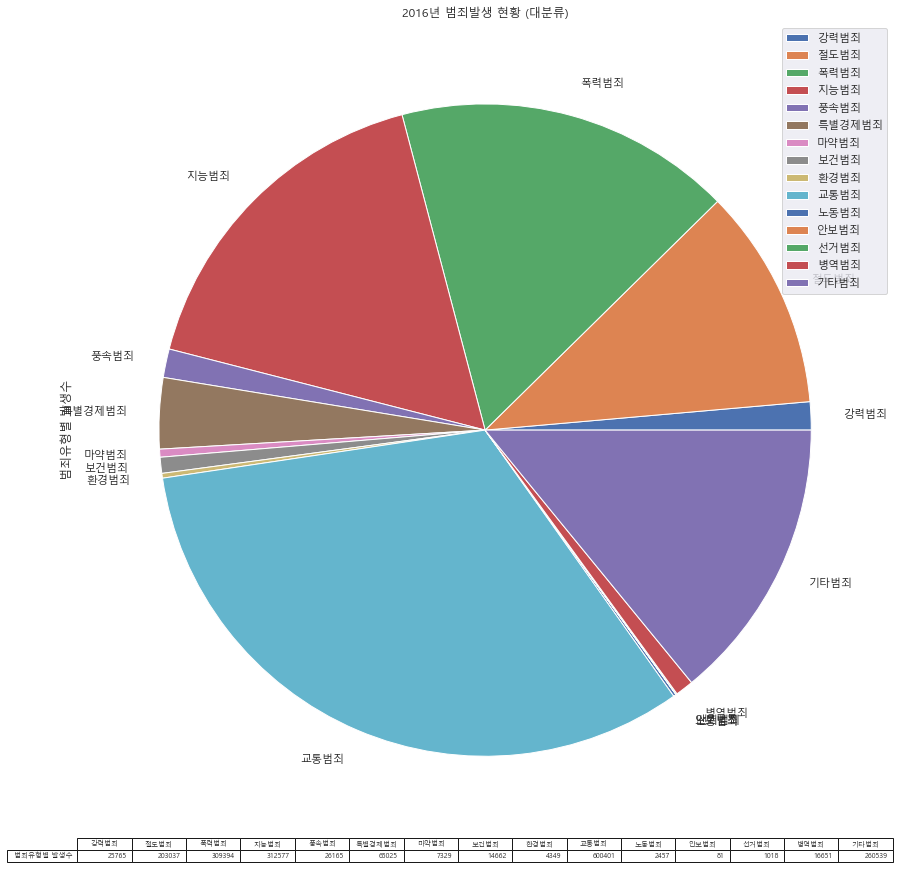

In [44]:
plt.rcParams["figure.figsize"] = [15,15]
crime_stat.plot(kind='pie', title='2016년 범죄발생 현황 (대분류)', 
                label='범죄유형별 발생수', legend=True, table=True);